<a href="https://colab.research.google.com/github/ipseekamalla1/garbage-classifier/blob/main/python_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print('Hello,This is shared google collab')

Hello,This is shared google collab


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset successfully extracted to /content/drive/MyDrive/content/garbage_dataset


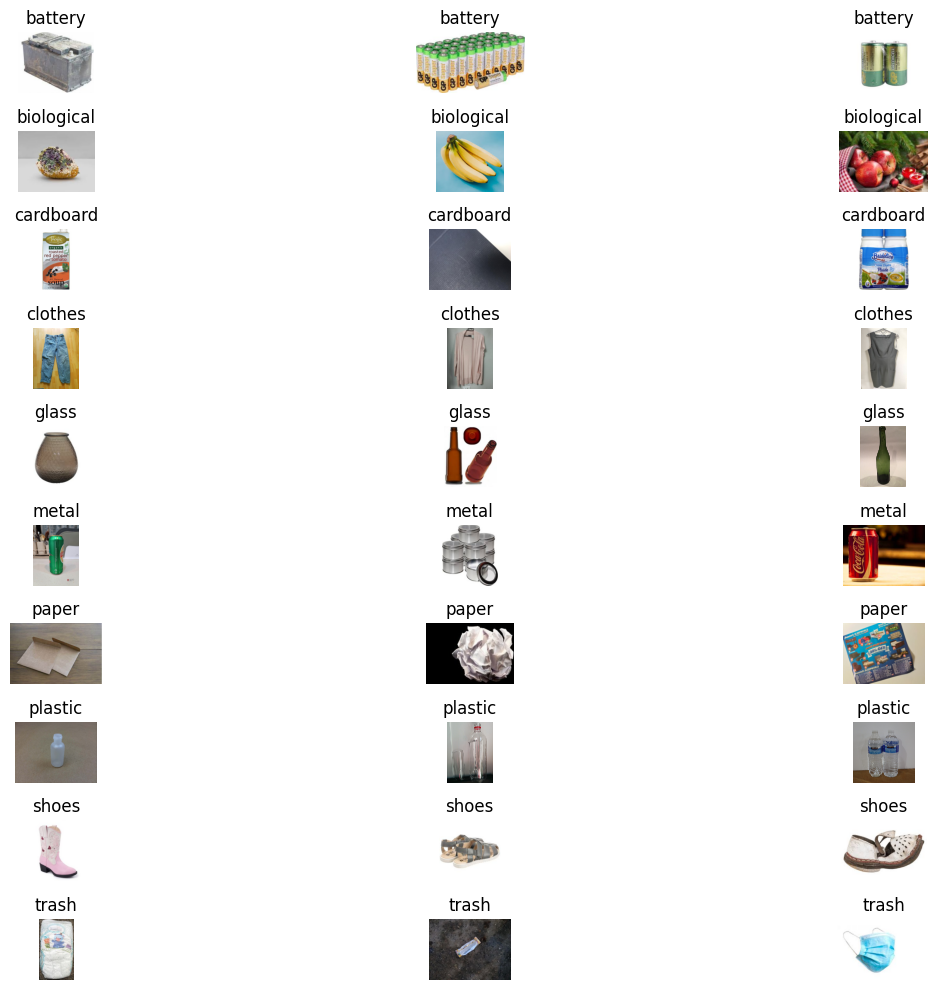

In [2]:
import os
import zipfile
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the zip file in Google Drive
zip_file = '/content/drive/MyDrive/content/garbage_dataset.zip'

# Directory to extract the dataset
extract_to = '/content/drive/MyDrive/content/garbage_dataset'

# Ensure the directory exists
os.makedirs(extract_to, exist_ok=True)

# Unzip the file
try:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
        print(f"Dataset successfully extracted to {extract_to}")
except FileNotFoundError:
    print(f"Error: The file {zip_file} was not found.")
except zipfile.BadZipFile:
    print(f"Error: The file {zip_file} is not a valid zip file.")

# Define the path to the dataset
dataset_path = '/content/drive/MyDrive/content/garbage_dataset/garbage_dataset'

# Define the categories
categories = ["battery", "biological", "cardboard", "clothes", "glass", "metal", "paper", "plastic", "shoes", "trash"]

# Define the number of images to display from each category
num_images_to_display = 3

# Set up the plot
fig, axes = plt.subplots(len(categories), num_images_to_display, figsize=(15, 10))

# Loop through each category
for i, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)

    # Ensure the category folder exists
    if not os.path.exists(category_path):
        print(f"Missing category folder: {category_path}")
        continue  # Skip this category if the folder does not exist

    image_files = os.listdir(category_path)

    # Ensure there are images in the category folder
    if len(image_files) == 0:
        print(f"No images found in {category_path}")
        continue

    random.shuffle(image_files)  # Shuffle the list of image files

    # Display randomly selected images
    for j in range(min(num_images_to_display, len(image_files))):  # Handle less than expected images
        img_file = image_files[j]
        img_path = os.path.join(category_path, img_file)
        img = mpimg.imread(img_path)
        axes[i, j].imshow(img)
        axes[i, j].set_title(category)
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()


In [5]:
def count_images_in_split(folder):
    print(f"Folder: {folder}")
    classes = []
    for root, dirs, files in os.walk(folder):
        for dir in dirs:
            classes.append(dir)
    print(f"Classes: {classes}")
    for class_name in classes:
        class_path = os.path.join(folder, class_name)
        num_images = len(os.listdir(class_path))
        print(f"Class: {class_name} - Number of Images: {num_images}")

# Verify the number of images in each split for each class
print("Training Set:")
count_images_in_split('train_dataset/')

print("\nTest Set:")
count_images_in_split('test_dataset/')

Training Set:
Folder: train_dataset/
Classes: []

Test Set:
Folder: test_dataset/
Classes: []
